In [1]:
import pandas as pd
import pickle

from model_evaluation import *

%matplotlib widget
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Model support
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, roc_auc_score, roc_curve, 
                             precision_recall_curve)

In [2]:
data = pd.read_csv("../Exploratory Data Analysis/analyzed.csv", sep=',', lineterminator='\n')
data.head()

,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,...,friends_log,followers_log,favs_log,avg_daily_tweets_log,network,tweet_to_followers,follower_acq_rate,friends_acq_rate,favs_rate,hour_created\r
0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,...,1.609,7.438,1.609,2.008,11.968,70.512,0.607,0.002,0.002,21
1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,...,6.749,6.714,6.248,0.118,45.313,37.126,0.343,0.354,0.354,5
2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,...,6.692,5.268,8.320,0.514,35.253,37.358,0.103,0.372,0.372,5
3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,...,6.492,6.346,9.219,0.575,41.198,47.008,0.238,0.271,0.271,13
4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,...,4.779,13.525,5.030,0.760,64.636,113.137,5.296,0.031,0.031,16


In [4]:
data = pd.read_csv("../Exploratory Data Analysis/analyzed1.csv", sep=',', lineterminator='\n')
data.head()

,is_bot,id,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,...,avg_daily_favorites,friends_log,followers_log,favs_log,avg_daily_tweets_log,network,tweet_to_followers,follower_acq_rate,friends_acq_rate,favs_rate\r
0,1,787405734442958848,best_in_dumbest,NaN,"Blame @xaiax, Inspired by @MakingInvisible, us...",1,0,1698,4,53,...,1.0,1.609,7.438,1.609,1.945,11.968,70.512,0.575,0.002,0.002
1,0,796216118331310080,CJRubinPhoto,United States,Photographing the American West since 1980. I ...,1,0,823,852,5,...,0.0,6.749,6.714,6.248,0.110,45.313,37.126,0.323,0.332,0.332
2,1,875949740503859200,SVGEGENT,NaN,"Part savage, all gentleman 🧐\n ...",1,0,193,805,2,...,0.0,6.692,5.268,8.320,0.481,35.253,37.358,0.095,0.347,0.347
3,1,756119643622735872,TinkerVHELPK5,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! Assistan...,1,0,569,659,2,...,0.0,6.492,6.346,9.219,0.545,41.198,47.008,0.223,0.255,0.255
4,0,464781334,JoleonLescott,"England, United Kingdom","Loans Manager @mancity, @pumafootball Ambassad...",1,0,748235,118,1818,...,191.0,4.779,13.525,5.030,0.740,64.636,113.137,5.257,0.030,0.030


In [7]:
features = ['verified', 'hour_created', 'geo_enabled', 'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day','network', 'tweet_to_followers', 'follower_acq_rate', 'friends_acq_rate', 'favs_rate\r']


data[features].shape

(36590, 15)

In [4]:
X = data[features]
y = data['is_bot']

In [5]:
# split data into training and testing data
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [6]:
# Models that require scaling: 
knn = KNeighborsClassifier()
lr = LogisticRegression()

# Scaling
scalar = StandardScaler()
scalar.fit(X)
X_train_scaled = scalar.transform(X)

model_list = [knn, lr]
kf = KFold(n_splits=5, shuffle=True, random_state=43)

multi_model_eval(model_list, X_train_scaled, y, kf)

Model: KNeighborsClassifier()
------------------------------
Accuracy:  0.80182 +- 0.004875
Precision: 0.73750 +- 0.008089
Recall:    0.69315 +- 0.010166
F1 Score:  0.71456 +- 0.005630
ROC AUC:   0.85363 +- 0.006772

Model: LogisticRegression()
------------------------------
Accuracy:  0.81029 +- 0.001932
Precision: 0.74087 +- 0.005931
Recall:    0.72274 +- 0.005608
F1 Score:  0.73166 +- 0.003188
ROC AUC:   0.86626 +- 0.006015



In [7]:
# Models that don't require scaling
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
xgb = XGBClassifier()

model_list = [tree, forest, xgb]
kf = KFold(n_splits=3, shuffle=True, random_state=43)

multi_model_eval(model_list, X, y, kf)

Model: DecisionTreeClassifier()
------------------------------
Accuracy:  0.79741 +- 0.003022
Precision: 0.71647 +- 0.012759
Recall:    0.71862 +- 0.005562
F1 Score:  0.71743 +- 0.003665
ROC AUC:   0.78001 +- 0.001478

Model: RandomForestClassifier()
------------------------------
Accuracy:  0.85234 +- 0.001783
Precision: 0.83591 +- 0.003139
Recall:    0.73090 +- 0.003563
F1 Score:  0.77988 +- 0.002588
ROC AUC:   0.91675 +- 0.001446

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_par

#### Parameter tuning for KNN using RandomizedSearchCV. GridSearchCV take a whole lot of time as it is a brute force method

In [8]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
metric_options = ['minkowski', 'chebyshev']
leaf_option = list(range(20,40))
p_option = [1,2]
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options, p=p_option, n_jobs=[-1])
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'chebyshev'], 'p': [1, 2], 'n_jobs': [-1]}


In [9]:
# Scaling
scalar = StandardScaler()
scalar.fit(X)
X_train_scaled = scalar.transform(X)

grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train_scaled, y)


pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.809043,0.006588,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ..."
1,0.770468,0.007975,"{'weights': 'distance', 'p': 1, 'n_neighbors':..."
2,0.815524,0.008561,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ..."
3,0.808418,0.006373,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ..."
4,0.811854,0.007713,"{'weights': 'distance', 'p': 2, 'n_neighbors':..."
5,0.805373,0.005569,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ..."
6,0.764572,0.005261,"{'weights': 'distance', 'p': 2, 'n_neighbors':..."
7,0.808028,0.006265,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ..."
8,0.811658,0.007247,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ..."
9,0.801858,0.005680,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ..."


In [10]:
print(grid.best_params_ )
print(grid.best_score_)

{'weights': 'uniform', 'p': 1, 'n_neighbors': 24, 'n_jobs': -1, 'metric': 'minkowski'}
0.8155241308024864


#### Parameter tuning for Random Forest using RandomizedSearchCV. GridSearchCV take a whole lot of time as it is a brute force method

In [11]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

folds = 3
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 43)

grid = RandomizedSearchCV(forest, param_grid, n_iter=5, scoring='accuracy', return_train_score=False, n_jobs=-1, cv=skf.split(X,y), verbose=3, random_state=1001)
grid.fit(X, y)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,mean_test_score,std_test_score,params
0,0.827392,0.004130,"{'n_estimators': 200, 'max_features': 'log2', ..."
1,0.812166,0.003314,"{'n_estimators': 200, 'max_features': 'log2', ..."
2,0.822395,0.002447,"{'n_estimators': 200, 'max_features': 'sqrt', ..."
3,0.822395,0.003009,"{'n_estimators': 500, 'max_features': 'auto', ..."
4,0.831804,0.004955,"{'n_estimators': 500, 'max_features': 'sqrt', ..."


In [12]:
print(grid.best_params_ )
print(grid.best_score_)

{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
0.8318039602167532


#### Parameter tuning for XG Boost using RandomizedSearchCV. GridSearchCV take a whole lot of time as it is a brute force method

In [13]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 3
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 43)

grid = RandomizedSearchCV(xgb, params, n_iter=5, scoring='accuracy', return_train_score=False, n_jobs=-1, cv=skf.split(X,y), verbose=3, random_state=1001)
grid.fit(X, y)


pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,mean_test_score,std_test_score,params
0,0.846797,0.001962,"{'subsample': 1.0, 'min_child_weight': 5, 'max..."
1,0.849139,0.001424,"{'subsample': 0.6, 'min_child_weight': 1, 'max..."
2,0.851325,0.002795,"{'subsample': 0.8, 'min_child_weight': 5, 'max..."
3,0.850857,0.003031,"{'subsample': 1.0, 'min_child_weight': 5, 'max..."
4,0.851989,0.003883,"{'subsample': 0.8, 'min_child_weight': 1, 'max..."


In [14]:
print(grid.best_params_ )
print(grid.best_score_)

{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 1.0}
0.851989016453798


#### Te scores for KNN was the only one that performed significantly better after trying prameter tunning using randomizedSearchCV. and we also see from the base model that there is a signifcant balance between
Precision and Recall matrics and high ROC AUC scores with these 3 models

Next we will plot Precision-Recall and ROC curves

Average AUC Score: 0.8832 +- 0.004215


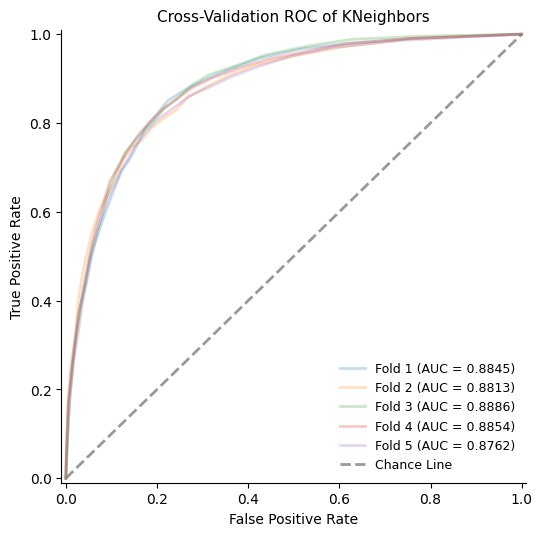

In [15]:
knn = KNeighborsClassifier(weights='uniform', p=1, n_neighbors=24, n_jobs=-1, metric='minkowski')
scalar = StandardScaler()
scalar.fit(X)
X_train_scaled = scalar.transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=43)

roc_curve_cv(knn, X_train_scaled, y, kf, model_alias='KNeighbors')

Average Precision Score: 0.7622 +- 0.005844
Average Recall Score: 0.7081 +- 0.015563


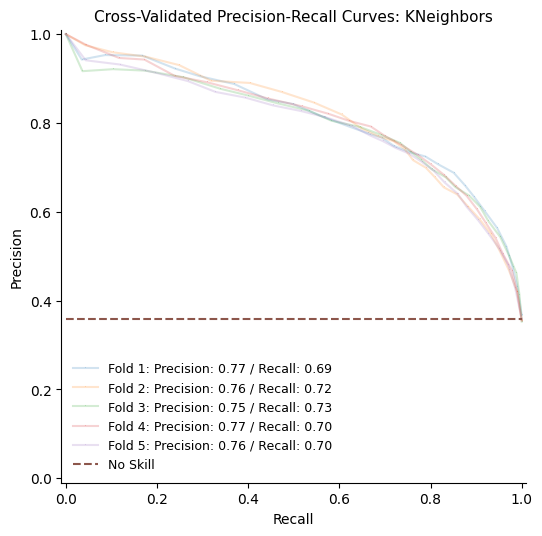

In [16]:
precision_recall_cv(knn, X_train_scaled, y, kf, model_alias='KNeighbors')

Average AUC Score: 0.9182 +- 0.003980


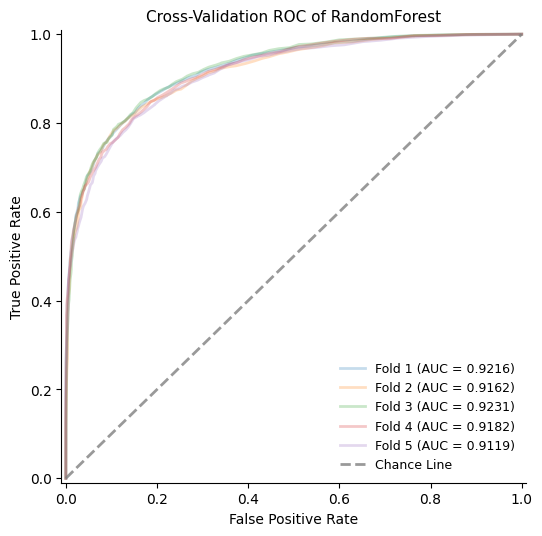

In [17]:
forest = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=43)

roc_curve_cv(forest, X, y, kf, model_alias='RandomForest')

Average Precision Score: 0.8389 +- 0.007580
Average Recall Score: 0.7333 +- 0.009849


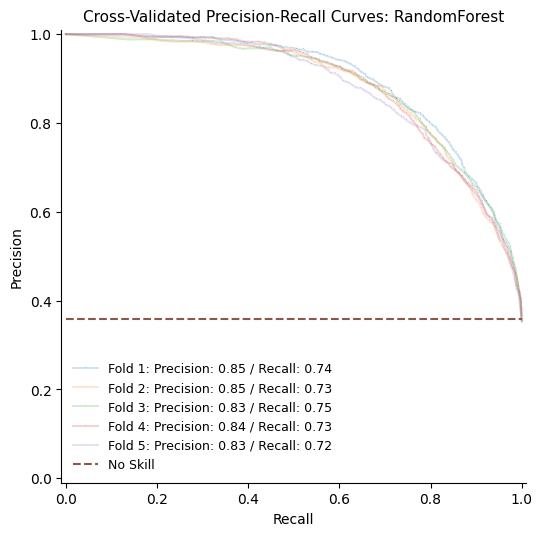

In [18]:
precision_recall_cv(forest, X, y, kf, model_alias='RandomForest')

Average AUC Score: 0.9191 +- 0.002432


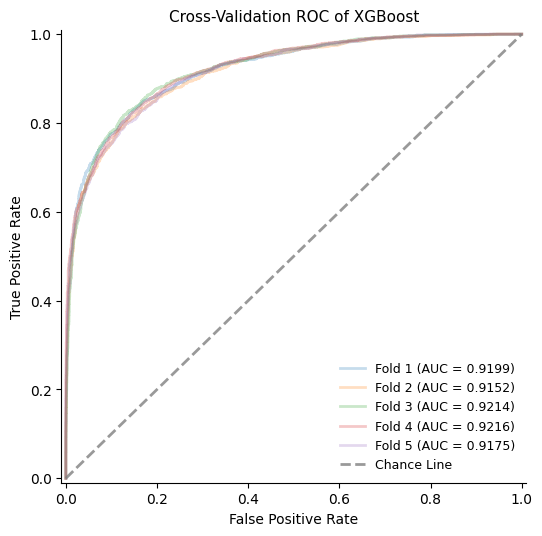

In [19]:
xgb = XGBClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=43)

roc_curve_cv(xgb, X, y, kf, model_alias='XGBoost')

Average Precision Score: 0.8287 +- 0.005966
Average Recall Score: 0.7482 +- 0.007494


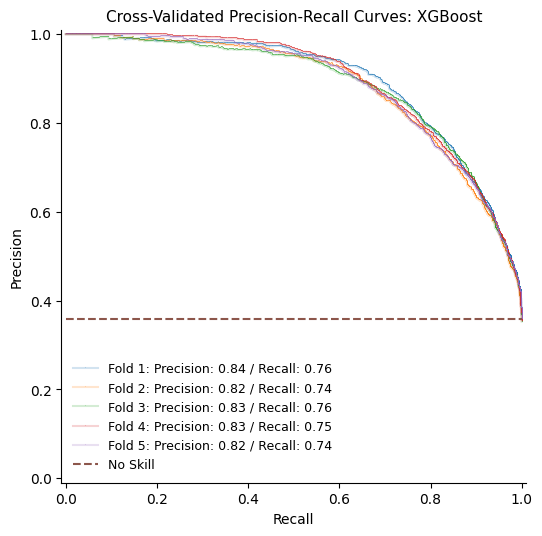

In [20]:
precision_recall_cv(xgb, X, y, kf, model_alias='XGBoost')

We will look into the kind of effect the balancing the classes has on the accuracy of the model.
Note that unbalanced classes has little to no effect on KNN algorithm

In [21]:
num_bots = len(data[data['is_bot'] == 1])
num_humans = len(data[data['is_bot'] == 0])

print("Number of bots: ", num_bots)
print("Number of humans: ", num_humans)
print(f'Percentage of bots/fake account in the dataset: {(num_bots / len(data))*100:.2f}')

Number of bots:  13098
Number of humans:  23492
Percentage of bots/fake account in the dataset: 35.80


In [22]:
# For XGBoost
estimate = num_humans/num_bots

forest = RandomForestClassifier(class_weight='balanced')
xgb = XGBClassifier(scale_pos_weight=estimate)

models = [forest, xgb]
kf = KFold(n_splits=5, shuffle=True, random_state=33)

multi_model_eval(models, X, y, kf)

Model: RandomForestClassifier(class_weight='balanced')
------------------------------
Accuracy:  0.85277 +- 0.004227
Precision: 0.84045 +- 0.012817
Recall:    0.72675 +- 0.008701
F1 Score:  0.77938 +- 0.006063
ROC AUC:   0.91736 +- 0.003706

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.7935562681325392,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
------------------------------
Accuracy:  0.84445 +- 0.004281
Precision: 0.77479 +- 0.010063
Recall:    0.79726 +- 0.009567
F1 Score:  0.7

Average AUC Score: 0.9169 +- 0.003411


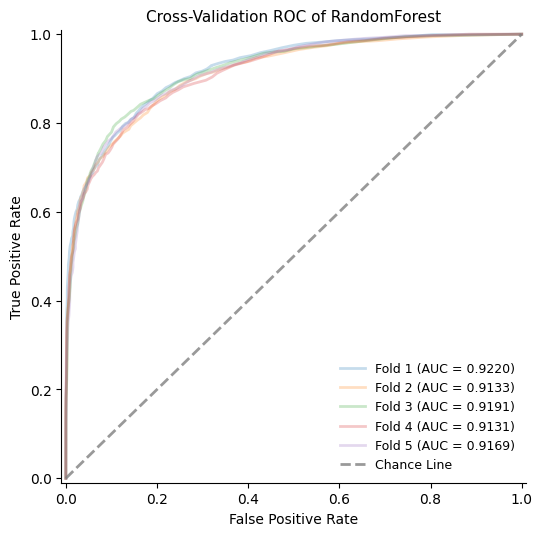

In [23]:
roc_curve_cv(forest, X, y, kf, model_alias='RandomForest')

Average Precision Score: 0.8408 +- 0.011033
Average Recall Score: 0.7244 +- 0.008755


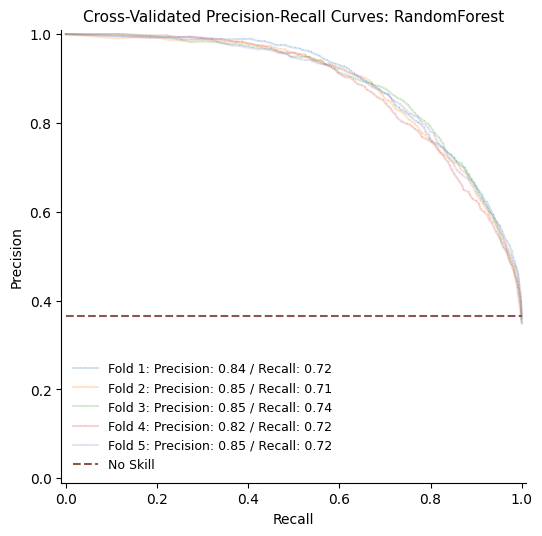

In [24]:
precision_recall_cv(forest, X, y, kf, model_alias='RandomForest')

Average AUC Score: 0.9186 +- 0.003329


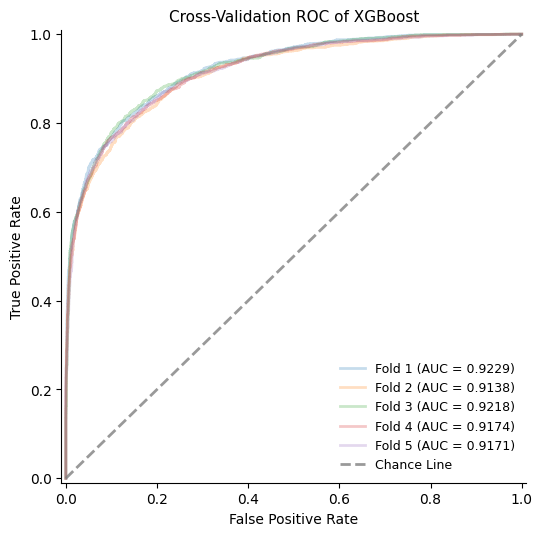

In [25]:
roc_curve_cv(xgb, X, y, kf, model_alias='XGBoost')

Average Precision Score: 0.7748 +- 0.010063
Average Recall Score: 0.7973 +- 0.009567


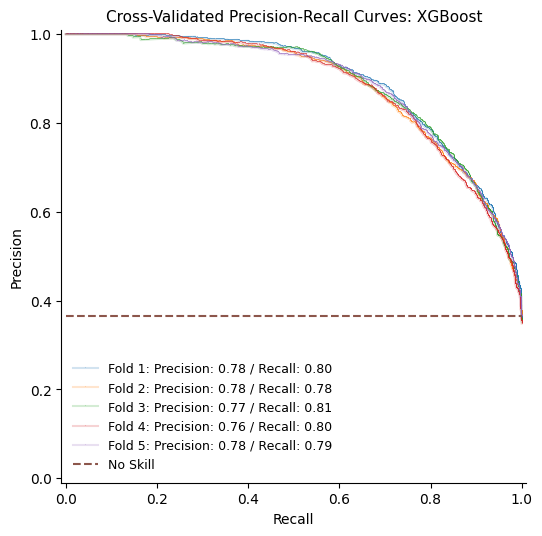

In [26]:
precision_recall_cv(xgb, X, y, kf, model_alias='XGBoost')

### Confusion Matrices

Let's take a look at the confusion matrices of each model for a single train/test split.

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=43)

Classification Metrics Report
-----------------------------
Accuracy:  0.6017
Precision: 0.4090
Recall:    0.1850
F1 Score:  0.2547

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      4047
           1       0.41      0.18      0.25      2357

    accuracy                           0.60      6404
   macro avg       0.52      0.51      0.49      6404
weighted avg       0.56      0.60      0.55      6404




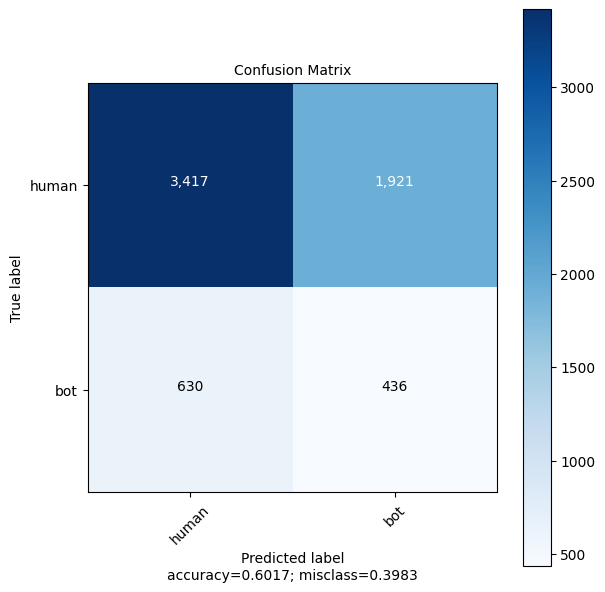

In [28]:
knn = KNeighborsClassifier(weights='distance', p=1, n_neighbors=13, n_jobs=-1, metric='minkowski')
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)

knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_val)
metrics_report(preds, y_val)

Classification Metrics Report
-----------------------------
Accuracy:  0.8521
Precision: 0.8521
Recall:    0.7238
F1 Score:  0.7827

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4047
           1       0.85      0.72      0.78      2357

    accuracy                           0.85      6404
   macro avg       0.85      0.83      0.84      6404
weighted avg       0.85      0.85      0.85      6404




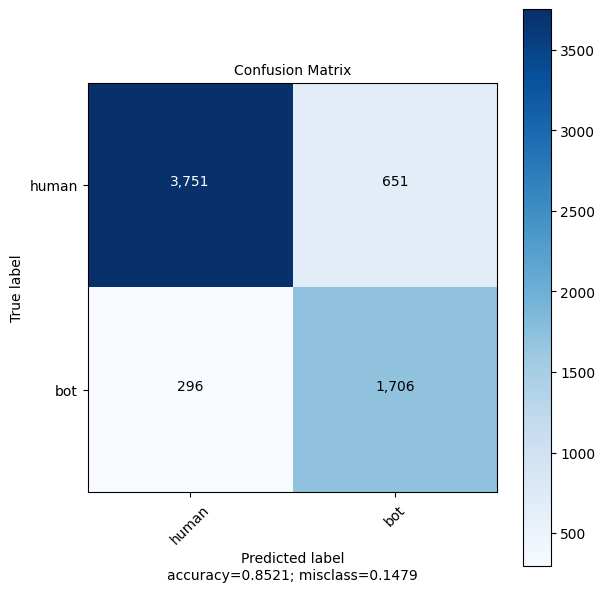

In [29]:
forest = RandomForestClassifier(class_weight='balanced')

forest.fit(X_train, y_train)
preds = forest.predict(X_val)
metrics_report(preds, y_val)

Classification Metrics Report
-----------------------------
Accuracy:  0.8418
Precision: 0.7759
Recall:    0.8019
F1 Score:  0.7887

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4047
           1       0.78      0.80      0.79      2357

    accuracy                           0.84      6404
   macro avg       0.83      0.83      0.83      6404
weighted avg       0.84      0.84      0.84      6404




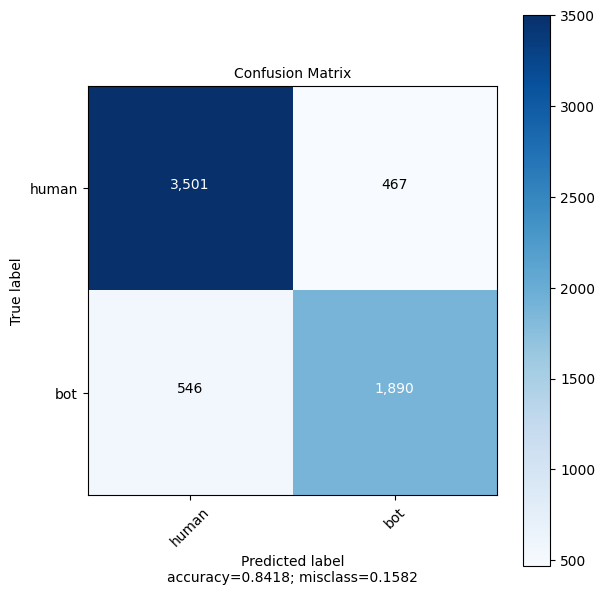

In [30]:
xgb = XGBClassifier(scale_pos_weight=estimate)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_val)

metrics_report(preds, y_val)

#### Notice that the KNN algorithm performed poorly using the confusion metrics so we would drop that

### Feature Importance

How does each model use the features? 

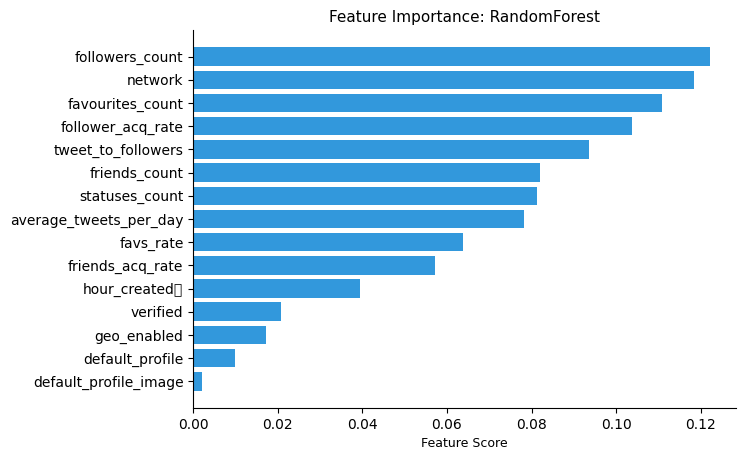

In [31]:
plot_feature_importance(forest, features, model_alias='RandomForest')

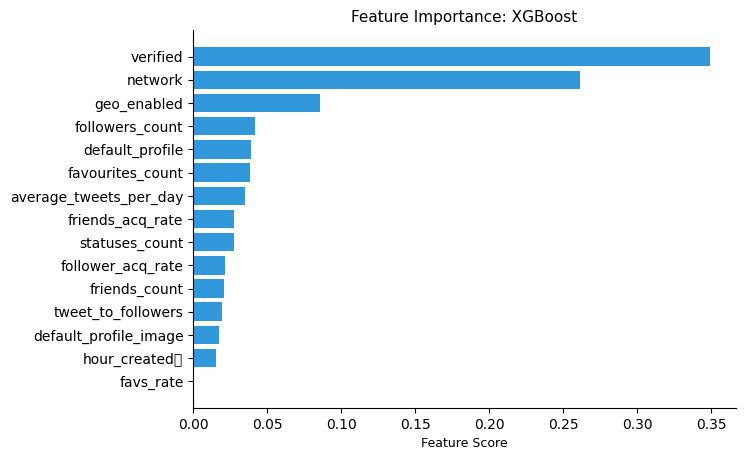

In [32]:
plot_feature_importance(xgb, features, model_alias='XGBoost')

It's actually quite interesting how each model uses the features! Network is important for both, but the rest is pretty scattered. Favourites count seems pretty important in both, so does average tweets per day. RandomForest doesn't have verified as more important.

What's also interesting to note is that the feature scores in RandomForest are much more even than XGBoost - where network and verified are very high and the rest are much smaller.

### Ensembling with VotingClassifier

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=1234)

In [34]:
forest = RandomForestClassifier(class_weight='balanced')
forest = forest.fit(X_train, y_train)

xgb = XGBClassifier(scale_pos_weight=1.8, 
                    tree_method='hist', 
                    learning_rate=0.1,           
                    eta=0.01,                 
                    max_depth=7,                
                    gamma=0.05,
                    n_estimators=200,
                    colsample_bytree=.8
                   )

xgb = xgb.fit(X_train, y_train)

In [35]:
models = [('forest', forest), ('xgb', xgb)]

voting_classifier = VotingClassifier(estimators=models,
                                     voting='soft',
                                     n_jobs=-1)

voting_classifier = voting_classifier.fit(X_train, y_train)

Classification Metrics Report
-----------------------------
Accuracy:  0.8565
Precision: 0.8119
Recall:    0.7746
F1 Score:  0.7928

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4960
           1       0.81      0.77      0.79      2724

    accuracy                           0.86      7684
   macro avg       0.85      0.84      0.84      7684
weighted avg       0.86      0.86      0.86      7684




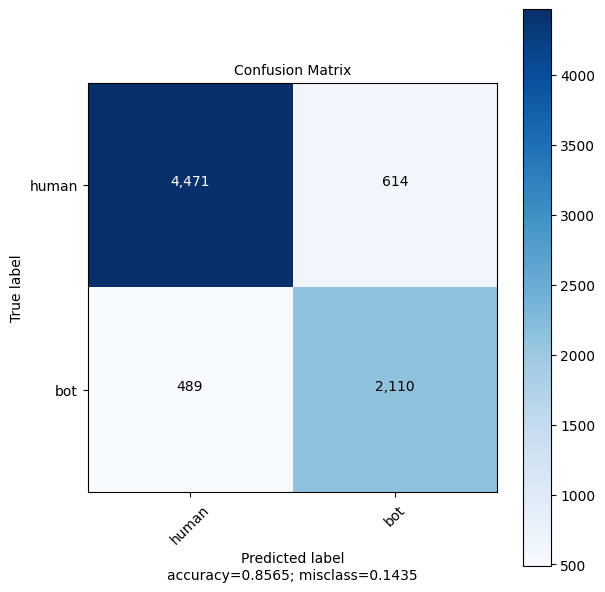

In [36]:
voting_classifier_prediction = voting_classifier.predict(X_val)

metrics_report(voting_classifier_prediction, y_val)

#### So far we see that the XG Boost model performs better than all other models in classifying fake accounts and has an ovecrall balanced metric check. We will select the model as the final estimator. Note that the voting classifier uses all the dataset above. See below for the XGBoost full dataset confusion matrix

## Finalize model and Save as pickle to use later!

we remove the favs_rate feature since it has no effect on the model performance

In [37]:
features = ['verified', 'hour_created\r', 'geo_enabled', 'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day','network', 'tweet_to_followers', 'follower_acq_rate', 'friends_acq_rate']

X = data[features]
y = data['is_bot']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [38]:
# Full train & test
best_model = XGBClassifier(scale_pos_weight=1.8, 
                    tree_method='hist', 
                    learning_rate=0.1,           
                    eta=0.01,                 
                    max_depth=7,                
                    gamma=0.05,
                    n_estimators=200,
                    colsample_bytree=.8
                   )

best_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.01, gamma=0.05,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.8, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

Classification Metrics Report
-----------------------------
Accuracy:  0.8446
Precision: 0.7767
Recall:    0.7945
F1 Score:  0.7855

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7046
           1       0.78      0.79      0.79      3931

    accuracy                           0.84     10977
   macro avg       0.83      0.83      0.83     10977
weighted avg       0.85      0.84      0.84     10977




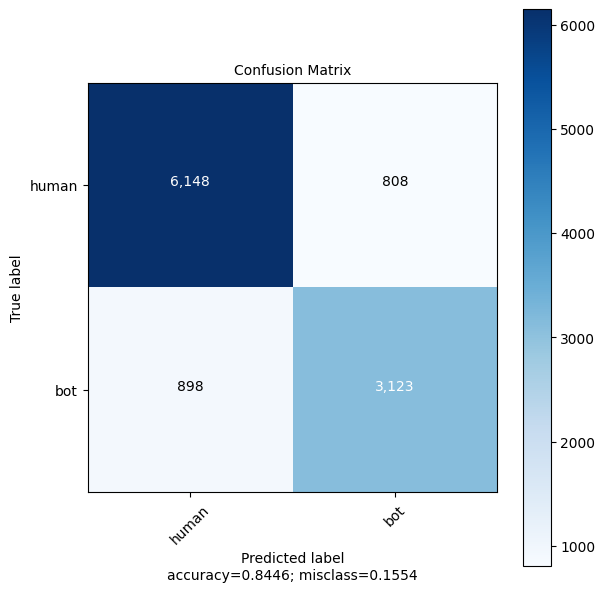

In [39]:
best_model_prediction = best_model.predict(X_test)

metrics_report(best_model_prediction, y_test)

ROC AUC score: 0.9216



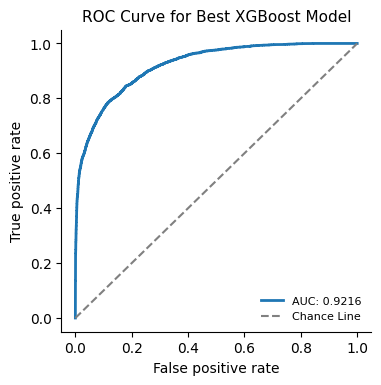

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

model_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr, tpr,lw=2, label=f'AUC: {model_auc:.4f}')
plt.plot([0,1],[0,1],c='grey',ls='--', label='Chance Line')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', fontsize=10)
plt.ylabel('True positive rate', fontsize=10)
plt.title('ROC Curve for Best XGBoost Model', fontsize=11)
plt.legend(loc='lower right', prop={'size': 8}, frameon=False)
sns.despine()
print(f'ROC AUC score: {model_auc:.4f}')
print("")
plt.show();

Precision score: 0.7767
Rcall score: 0.7945



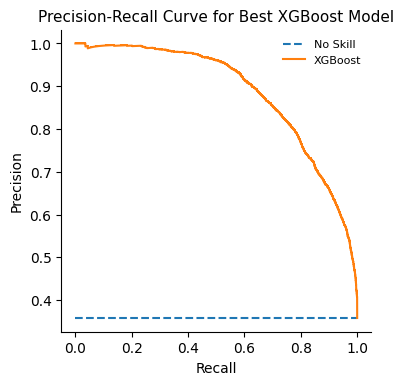

In [41]:
# Prec Recal Curve here

model_precision, model_recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:,1])

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(model_recall, model_precision, marker=',', label='XGBoost')
# axis labels
plt.title('Precision-Recall Curve for Best XGBoost Model', fontsize=11)
plt.xlabel('Recall', fontsize=10)
plt.ylabel('Precision', fontsize=10)
# show the legend
plt.legend(loc='upper right', prop={'size': 8}, frameon=False)
# show the plot
sns.despine()

pred = best_model.predict(X_test)
prec_score = precision_score(y_test, pred)
rec_score = recall_score(y_test, pred)

print(f'Precision score: {prec_score:.4f}')
print(f'Rcall score: {rec_score:.4f}')
print("")

In [42]:
fully_trained_model = XGBClassifier(scale_pos_weight=1.8, 
                                    tree_method='hist', 
                                    learning_rate=0.1,           
                                    eta=0.01,                 
                                    max_depth=7,                
                                    gamma=0.05,
                                    n_estimators=200,
                                    colsample_bytree=.8
                                   )

fully_trained_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.01, gamma=0.05,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.8, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [43]:
with open('model.pickle', 'wb') as to_write:
   pickle.dump(fully_trained_model, to_write)